In [1]:
#Just setting up pandas and installing a library that can read excel documents in juypter.  Also imported some libraries for graphing later.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install openpyxl
ET = pd.read_excel('ETdata-final.xlsx')
ETnames = pd.read_excel('ETdatanames.xlsx')
print(ET)
#Taking a first look at our dataset

      Duration (in seconds)  Finished         ResponseId    Question 1  \
0                         0         1  R_1nNgY6zOySLHVHK           NaN   
1                        43         1  R_3KW6JTGo4sAgz9b           NaN   
2                       995         1  R_2QLjplowbFaVxht           NaN   
3                      1771         1  R_12Mbn3LRDhz6EQh           NaN   
4                       247         1  R_1HqxRptdZNpi4nu           NaN   
...                     ...       ...                ...           ...   
1137                    103         0  R_2doUEogfpzVi6Pe  20,6,8,14,11   
1138                    473         1  R_42sM8nSQdflmddn         20,14   
1139                 747666         0  R_30eQfwUwcsWmC02           NaN   
1140                    607         0  R_2sevi5Bb55ZeIy5        20,6,7   
1141                    637         0  R_ZmGjlgTbrpPNAWd             3   

      Question 2        Q8   Q9    Q10  Q11  Q51  ...  Q33_5  Q33_6  Q33_7  \
0            NaN       NaN  NaN  

This data comes from a questionnaire given out to all St Andrews students in second year or above.  The questions looked at the impact of emergency online learning on student life during the fully online semester (semester 2 of the 2020-2021 academic year).  Student life is measured through three categories: academics, wellbeing, and social.  The questionnaire also contained free response text options, but for the purpose of this analysis they have been removed.

The aim of this research is to determine 1) the overall effect of emergency online learning on student life, including any positive aspects that could be implemented into future semesters, and 2) if any cohorts of students were particularly affected by emergency online learning.  These aims will be referred to as Part 1 and Part 2 respectively. 

For the purpose of this assignment, my goal is to identify potentially interesting/significant pieces of data using basic descriptive statistics and data visualization.  Later I can delve further into these pieces using inferential statistics.

Part 1 will also aim to identify whether the questionnaire was efficient by looking at the duration it took to complete and the number of students who fully completed it.

For ease of analysis, the full-length questions are kept in a corresponding datasheet (ETnames).  Otherwise, there would be two names for each column.  The shorter question titles are easier to refer to within the code, so those were kept in the main datasheet (ET).

Part 1: Overall Effect on Student Life

This part will focus on analyzing the categories of student life (academic, wellbeing, social) separately, but visualizing them together to show the overall effect.
For the purpose of getting a general idea of the effect, demographic information will be ignored in this part; all students will be looked at together.



In [2]:
#I will start by looking at question 13, which includes a likert scale response from extremely dissatisfied (1)
#to extremely satisfied (5) for various teaching elements.
#I will try to find the average student rating for each question


#This function returns numerical answers to the tenth
#This is used throughout the data as "onedec" when I need to combine strings and numbers in a print function
def onedec(num):
    return "{:.1f}".format(num)


In [3]:
#This function returns two input dataframes within the defined column indexes.  This is to make sure that  we can get the question
#names (ETnames) lined up correctly with the column names from the other dataframe (ET).
def simind(df1, df2, startin, endin):
    return df1.iloc[:, startin:endin], df2.iloc[:, startin:endin]

Average Student Rating for Live online lectures on Microsoft Teams (or another platform): 3.2
Average Student Rating for Recorded lectures on Panopto (or another platform): 3.4
Average Student Rating for Live online tutorials: 3.3
Average Student Rating for Recorded tutorials: 2.8
Average Student Rating for Live online labs/practicals: 2.9
Average Student Rating for Recorded labs/practicals: 2.8
Average Student Rating for Live online seminars: 3.2
Average Student Rating for Recorded seminars: 3.0
Average Student Rating for Accessing library resources: 3.2
Average Student Rating for Schedule flexibility: 3.7
Average Student Rating for Online examinations: 3.7
Average Student Rating for Function of devices, WIFI, and online platforms: 3.5
Average Student Rating for Online group work: 2.8
Average Student Rating for University resources for academic support (CEED): 3.1
Average Student Rating for Feelings of identity/belonging within your school(s): 2.6
Average Student Rating for Feelings o

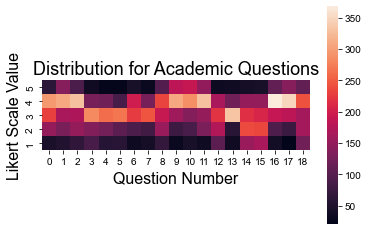

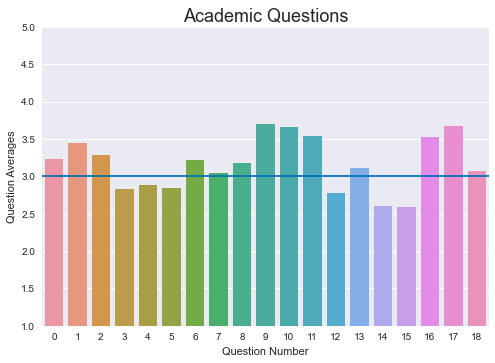

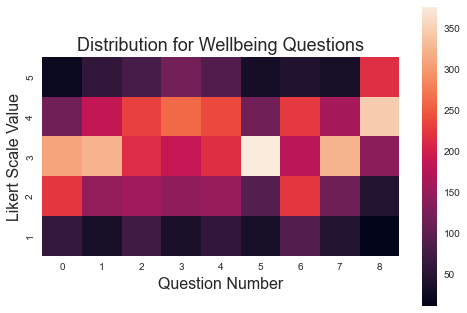

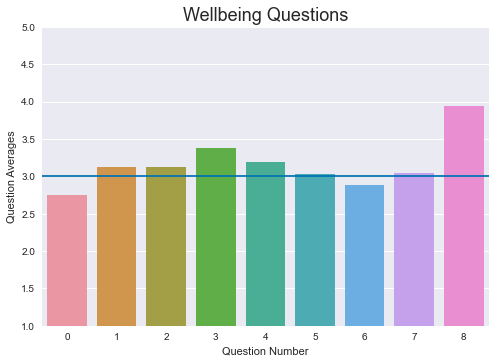

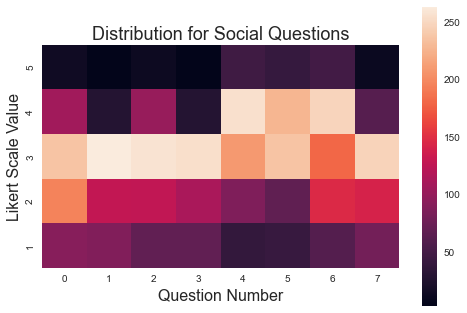

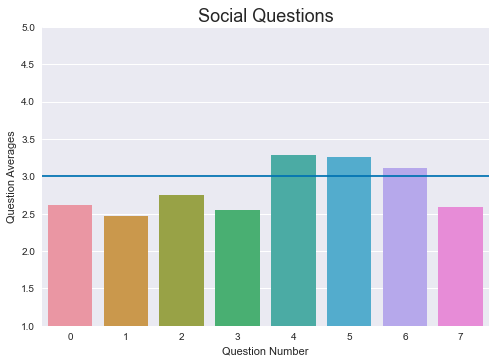

In [4]:
#These variables list the index start and end for the separate groups within the questionnaire (academic, wellbeing, and social)
#The numbers refer to the begininng of a group of questions (startin numbers) to the ending of the same set of questions (endin)
#The academic, wellbeing, and social questions all have multiple parts, so this is necessary to keep them intact.
startin = [29,49,59]
endin = [48,58,67]


#This list will be used to title the distribution graphs properly in the loop
fignames = ["Academic", "Wellbeing", "Social"]
boxdatalists = []


#This loop will be able to go through the three sections (academic, wellbeing, social) in the questionnaire at the same time
for indexes in zip(startin, endin, fignames):
    start = indexes[0]
    end = indexes[1]
    figname = indexes[2]
    
    #This crops the data to only include the relevant answers to current question groups
    questdata, questnames = simind(ET, ETnames, start, end)
    
    #This is a variable that defines a string slice.  The original piece of text included a boilerplate irrelvant text chunk before
    #the question, and this string slice just gets rid of that.
    outputStart = questnames.columns[0].find(')') + 2
    
    #Below I have created a loop that outputs the average student rating for questions 13_1 through 13_9 to the tenth.
    #Within the loop I also define the question using the string slice, so that the printed output matches the question content.
    for i in range(0, len(questdata.columns)):
        mean = questdata[questdata.columns[i]].mean()
        question = questnames.columns[i][outputStart:]
        print("Average Student Rating for " + question + ": " + onedec(mean))
    
    #To make coherent graphs, I need to create a new dataframe by creating two lists and appending them together.  This is here because
    #it needs to be in this loop; it needs to be run three times in order to create three new sets of axes.
    plt.figure()
    graphlist = []
    
    #Used the same loop as above but replaced mean with count in order to get the number of responses for each
    #question.  By using the same loop, I can do this analysis for all three sections at once. I have commented out the print function 
    #because the output is very long, but it is helpful to see the raw distribution values.  I sorted the index so that instead of seeing 
    #the index with the highest count first, it gives the indexes in order.
    for i in range(0, len(questdata.columns)):
        count = questdata[questdata.columns[i]].value_counts().sort_index()
        question = questnames.columns[i][outputStart:]
        
        
        #This creates the new dataframe by combining the lists, as I mentioned a few steps above.
        questlist = []
        for index in count.index:
            questlist.append(count[index])
            
        #Appending adds the list in the parentheses to the end of the inital list as a single list object    
        graphlist.append(questlist)
    
    #These variables below create dataframe from lists.  Transpose swaps the x and y of a dataframe.
    graphdata = pd.DataFrame(graphlist, columns = [1, 2, 3, 4, 5]).transpose().sort_index(ascending=False)
    boxdata = pd.DataFrame(graphlist, columns = [1, 2, 3, 4, 5])
    

    #This is plotting a heatmap graph showing the distribution of the question answers using seaborn. Graphing the distribution shows whether 
    #the results really are neutral (responses from 2-4) or whether there are two polarizing groups (1 and 5) that make the data look neutral. 
    #The x axis has the question, and the y axis has the likert scale value.  The hue shows the count for each likert scale value for that question.
    #The darker the colour, the fewer people answered that value.
    sns.heatmap(graphdata, square=True)#, x=graphdata.index, y=graphdata.columns)
    plt.style.use('seaborn')
    plt.title("Distribution for " + figname + " Questions", fontsize=18)
    plt.xlabel('Question Number', fontsize=16)
    plt.ylabel('Likert Scale Value', fontsize=16)
    
    #Below this is a set of barplots that show the data for academic, wellbeing, and social groupings in an easy-to-understand way.
    #For this I used the average of each question's answers.  The average needed to be calculated manually and then added as a column.
    plt.figure()
    responses = boxdata[1] + boxdata[2] + boxdata[3] + boxdata[4] + boxdata[5]
    question_avg = (boxdata[1] + 2*boxdata[2] + 3*boxdata[3] + 4*boxdata[4]+5*boxdata[5])/responses
    boxdata['Question Averages'] = question_avg
    #print(boxdata)
    sns.barplot(data=boxdata, x=boxdata.index, y='Question Averages')
    plt.style.use('seaborn-colorblind')
    plt.title(figname + " Questions", fontsize=18)
    plt.ylim(1,5)
    plt.axhline(3)
    plt.xlabel("Question Number")
    

In the heatmaps, darker colours represent answers that gained fewer responses, and lighter colours represent answers with more repsonses. By looking at the heatmaps, we can see that most students really did vote neutral or close to neutral.  There are likely not two polarizing groups of students voting oppositely.

From the other graphs, we can get the gist of how, on average, students are feeling about certain aspects of online learning and student life.  The x values correspond to the number of the question, which are also in order when outputted by the print function above the graphs.

There is a range of results for academic questions.  It appears that the following aspects were liked:

recorded lectures, schedule flexibility, online exams, function of devices/wifi/online platforms, online learning materials, and online reading lists

However, feelings of identity/belonging at both thet school and university level scored very low.

The aforementioned categories should be looked into for inferential statistics later to get an idea of how significant these differences are.

Before moving on to the cohort analysis, a few more individual questions relating to the questionnaire as a whole can be looked at. 

Part of this analysis focuses on the effectivity of the questionnaire.  The participant information sheet stated that it would take 10-15 minutes to complete.  The duration was recorded for each participant - so we can test whether the expected duration was correct, and if not, how much we need to alter future questionnaires to meet it.  It is possible that, as this was an online questionnaire, some participants may have left the questionnaire open and idled.  We will need to take this into consideration and look for outliers.

We also collected whether or not the participants completed the survey (with a value of 0 or 1). 

In [5]:
#This will test for the average.  If the number is ridiclously large, we will assume that there are outliers.
#The mean is divided by 60 to give the answer in minutes.
print("Average Duration: " + onedec(ET['Duration (in seconds)'].mean()/60) + " Minutes")
#The number was indeed ridiclously high, so now we can look at some other statistics and then try to come up
#with a more realistic answer.

print("Median Duration: " + onedec(ET['Duration (in seconds)'].median()/60) + " Minutes")
#The median looks normal

print(ET['Duration (in seconds)'].value_counts())
#There is a tie between three modes (10, 6, and 7 seconds), all with 10 values.  These modes are not useful as they are both not realistic numbers
#nor do they have a high number of values compared to dataset as a whole.  For this reason the mode will be excluded.

Average Duration: 115.6 Minutes
Median Duration: 9.6 Minutes
10        10
6         10
7         10
5          8
13         7
          ..
2031       1
361        1
1476       1
40         1
747666     1
Name: Duration (in seconds), Length: 815, dtype: int64


In [6]:
#This code removes outliers by taking out values within the column that have a z-score above 3.
ETstat = ET['Duration (in seconds)']
print(ETstat)
from scipy import stats
ETstatRem = ETstat[((ETstat-ETstat.mean()).abs() < 3*ETstat.std())]


0            0
1           43
2          995
3         1771
4          247
         ...  
1137       103
1138       473
1139    747666
1140       607
1141       637
Name: Duration (in seconds), Length: 1142, dtype: int64


In [7]:
#24 outliers were removed.  Lets see our average now!

print("Average Duration: " + onedec(ETstatRem.mean()/60) + " Minutes")


Average Duration: 33.7 Minutes


Text(0, 0.5, 'Duration in Seconds')

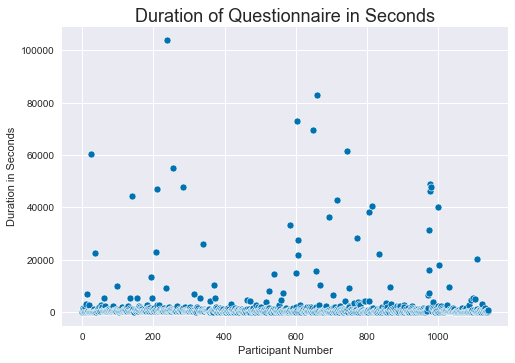

In [8]:
#This is still very high!  How unusual.  Maybe we can graph it and get a better idea of what's happening...
plt.figure()
sns.scatterplot(data=ETstatRem)
plt.style.use('seaborn')
plt.title("Duration of Questionnaire in Seconds", fontsize=18)
plt.xlabel("Participant Number")
plt.ylabel("Duration in Seconds")

In [9]:
#From this we can see that there still are a lot of "outliers" - but at what point does there become enough outliers
#that we can consider this an acceptable group?  Still, it's clear from the graph that the majority of participants
#hung around the bottom line together.  Let's try altering our data again to get just these participants.

ETstatRem2 = ETstat[((ETstat-ETstat.mean()).abs() < 0.2*ETstat.std())]
print("Average Duration: " + onedec(ETstatRem2.mean()/60) + " Minutes")

Average Duration: 14.6 Minutes


Text(0, 0.5, 'Duration in Seconds')

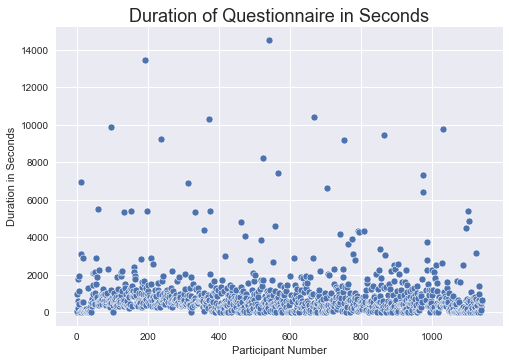

In [10]:
#Now lets graph it again
plt.figure()
sns.scatterplot(data=ETstatRem2)
plt.style.use('seaborn')
plt.title("Duration of Questionnaire in Seconds", fontsize=18)
plt.xlabel("Participant Number")
plt.ylabel("Duration in Seconds")

#We had to shrink the acceptable z-score from below 3 to below 0.2 to get a graph where the majority bottom line was even
#visible.  Still, the vasts majority of scores on the graph are below 2000 seconds (roughly 33 minutes).  For a 
#questionnaire that was only supposed to take 10-15 minutes, this makes sense.  The number of outliers is concerning,
#but it is difficult to tell on an unsupervised digital questionnaire whether participants were idling or whether they 
#really just took that long.  

#Even after "outliers" with a z-score of more than 0.2 were removed, the average was still 14.6 minutes, the upper side of
#our 10-15 minute estimate.  Future questionnaires should be closer to the middle of this (13 minutes).

In [11]:
#Looking at this graph, there are some values at 0 seconds.  The z score should be removing both top and bottom outliers,
#so this is quite strange - maybe there are enough 0 values that they are no longer statistically considered an outlier. 
#Participants who took 0 seconds to "complete" the questionnaire likely did not do it at all. In fact, participants who took
#between 0-10 seconds probably did not complete it.  I drew the boundary at 10 seconds just because it is possible a participant
#could answer a few questions in 10+ seconds; we are still looking at incomplete data, so this data would not be considered invalid.
#Just out of curiosity, how many people opened the questionnaire and then closed it within 0-10 seconds?

#I used this to find the value counts for values of 0-10 seconds.  The index goes to 8 instead of 10 because some values in 0-10 had 0, which
#caused it to display 0-12 instead of 0-10.  Changing the index to 0-8 fixed this.
ETstat0_10 = ETstat.value_counts().sort_index()[0:8]
print(ETstat0_10)



0      1
4      4
5      8
6     10
7     10
8      5
9      3
10    10
Name: Duration (in seconds), dtype: int64


In [12]:
#lets find the sum of how many participants took 10 or less seconds
print("Total Number of Participants Who Took 10 or Less Seconds to 'Finish': " + onedec(ETstat0_10.sum()))

#What percentage out of the total is that?  The total n value is 1143. The sum of the participants who took 10 or less seconds was divided by 1143
#and then multiplied by 100 to get the percent.
print("Percentage of Participants Who Took 10 or Less Seconds to 'Finish': " + onedec((ETstat0_10.sum()/1143)*100) + "%")

Total Number of Participants Who Took 10 or Less Seconds to 'Finish': 51.0
Percentage of Participants Who Took 10 or Less Seconds to 'Finish': 4.5%


In [13]:
#Next, let's quickly look at the completion rates for the questionnaire.  This is also tricky to analyse, as participants were
#allowed to fill out as much of the questionnaire as they felt comfortable with, excluding questions they did not want to answer.
#In this way, "completeness" becomes a strange measurement as incomplete results are not removed from the data.
#Regardless, let's look at the data.

#"0" indictates that the participant left the questionnaire before the end point and "1" indicates that they fully completed the
#questionnaire.  In this case, there was a prize draw at the end of the survey.
ETfin = ET['Finished'].value_counts()
print(ETfin)


0    736
1    406
Name: Finished, dtype: int64


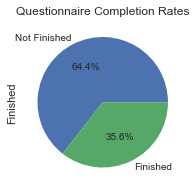

In [14]:
#Wow - a lot more people left the questionnaire unfinished.  Let's see a pie chart!
pie = ETfin.plot.pie(figsize=(3, 3), autopct="%1.1f%%", labels=["Not Finished", "Finished"])
plt.title("Questionnaire Completion Rates")
plt.show()

In [15]:
#I used this code to find the percentage 
print("Percentage of Unfinished Participants: " + onedec(ETfin[0]/(ETfin[0] + ETfin[1])*100) + "%")
print("Percentage of Finished Participants: " + onedec(ETfin[1]/(ETfin[0] + ETfin[1])*100) + "%")

#This could be another indication that the questionnaire was too long...

Percentage of Unfinished Participants: 64.4%
Percentage of Finished Participants: 35.6%


That concludes our analysis of how effective the questionnaire was.  Overall, the duration of the questionnaire had a large number of outliers.  While this could be due to participants leaving their devices idling while taking the questionnaire, the number was large enough to consider a worry.  Since the questionnaire also included free text boxes, participant could, hypothetically, take quite a while completing these.  After removing outliers based on their z-score, the average duration was still around 14.6 minutes.  This is very close to our upper limit for estimated duration of the questionnaire (advertised as 10-15 minutes).  

There was also numerous participants who spent 10 or less seconds on the questionnaire.  Roughly 4.5% of participants who clicked on the questionnaire gave up during the first 10 seconds.  If they took the time to open the questionnaire in the first place, they were probably willing to complete it if it was short enough/if they felt they had the time to.

Finally, the percentage of participants who did not finish the entire questionnaire was 64.4% - a majority.

All of these results imply that the questionnaire was less than ideal, and likely as a result of its length.  Future questionnaires testing the same data should be shortened to get more participant interaction.

Ideally, if we find that certain elements we tested in this questionnaire were not significant/interesting overall or to any demographic categories, we could omit them from future questionnaires.

In [16]:
#Next we will analyze some of the sliding scale questions.  There were three total: one for each section (academic, wellbeing, social).
#They asked the participant to rate how much their (academics/wellbeing/sociality) differed between semester 1 (2020-21) and semester 2 (2020-21).
#0 is drastically better in semester 1, and 19 is drastically better in semester 2.

#The two semesters are being compared because semester 1 was hybrid with some in person elements, while semester 2 was the first ever fully online
#semester.

#creating a dataframe with just these questions
scales = ET.iloc[:, [48, 58, 67]]
#print(scales)

In [17]:
print(scales['Q21_1'].value_counts())
print(scales['Q35_1'].value_counts())
print(scales['Q36_1'].value_counts())
#An error in the questionnaire was noticed: for the academic sliding scale, the range was 0-8, and for the other two, the range was 0-19

6.0     193
4.0     169
2.0      98
5.0      64
1.0      60
0.0      56
3.0      55
7.0      33
8.0      23
10.0      1
Name: Q21_1, dtype: int64
5.0     112
14.0     80
10.0     79
0.0      67
9.0      51
1.0      45
6.0      35
3.0      33
15.0     31
4.0      30
2.0      26
7.0      26
13.0     25
19.0     24
12.0     19
18.0     15
8.0      14
11.0     14
17.0     12
16.0      8
Name: Q35_1, dtype: int64
10.0    112
5.0     102
0.0      91
9.0      81
1.0      50
14.0     38
2.0      33
3.0      31
4.0      30
6.0      26
13.0     23
7.0      20
15.0     19
12.0     13
19.0     12
8.0      12
11.0     11
16.0      6
17.0      4
18.0      3
Name: Q36_1, dtype: int64


In [18]:
#A second error was noticed - even though the sliding scale for academics states that the range is 0-8, some values exceed 8.
#There is only one value for 10 in this data set and it occured in the first five rows - this potentially means it could be a test value from
#before the scale was (accidentally) set to 0-8.  Since it is only one value I will ignore it for now.
scales['Q21_1'].head()

0     NaN
1     NaN
2     NaN
3    10.0
4     NaN
Name: Q21_1, dtype: float64

In [19]:
#The only way to analyze these scales in a comparable way due to the errors is to make a new dataframe with the percentage of the values
#(i.e. the number/the max(8 or 19) *100 )

#This defines the rowss as percentages by dividing by the total value (8) and then multiplying by 100
scalesAca = (scales['Q21_1']/8)*100

#print(scalesAca)
#Yep, this seems to be working.  The 10 turned into 125%.  Let's see if we can drop that row...
scalesAca = scalesAca.drop(3)
print(scalesAca)

#And the other two scales:
scalesWel = (scales['Q35_1']/19)*100
scalesSoc = (scales['Q36_1']/19)*100

0        NaN
1        NaN
2        NaN
4        NaN
5        NaN
        ... 
1137     NaN
1138     0.0
1139     NaN
1140    25.0
1141    50.0
Name: Q21_1, Length: 1141, dtype: float64


In [20]:
#NOW we can start analyzing the scale data properly
#Once again, the loop from above will be used to analyze all three sections at once to save time/space.  It will only be altered slightly to focus on
#the relevant sliding scale questions.

#Turning our data into a list
scaleslist = [scalesAca, scalesWel, scalesSoc]
#This list will be used to title the graphs properly in the loop
fignamesScale = ["Academic Scale", "Wellbeing Scale", "Social Scale"]

#This loop will be able to go through the three sections (academic, wellbeing, social) in the questionnaire at the same time.  I find the mean,
#which is the average percentage of each of the above scales.

for indexes in zip(scaleslist, fignamesScale):
    scalein = indexes[0]
    fignamesScalein = indexes[1]
    mean = scalein.mean()
    question = fignamesScalein
    print("Average Student Rating Percentage for " + question + ": " + onedec(mean) + "%")

Average Student Rating Percentage for Academic Scale: 49.8%
Average Student Rating Percentage for Wellbeing Scale: 42.2%
Average Student Rating Percentage for Social Scale: 36.1%


Text(0.5, 1.0, 'Mean Percentage for Section Scales')

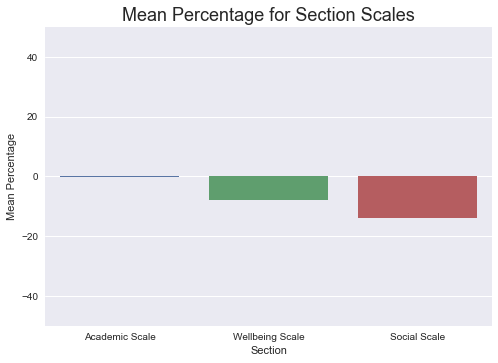

In [21]:
#The data will be a little difficult to graph.  Right now we have percentages, in which 0% is drastically better in semester 1,
#50% is neutral between the two semesters, and 100% is drastically better in semester 2.  From our averages, we can see that the
#percentages tend to be quite low - leaning towards better in semester 1.
#the best way to graph this is probably a barplot with 0 set to 50

plt.figure()

#This creates an ammended list with the average percentages -50 (to set 50 to 0, neutral)
meanlist = []
for scale in scaleslist:
    meanlist.append(scale.mean()-50)    
 

 #This creates a dataframe out of the scale list mean percentages above, and the zip function ensures they are in the current position to be
#graphed
scalegraph = pd.DataFrame(zip(fignamesScale, meanlist), columns=['Section', 'Mean Percentage'])

#This code plots a barplot, the ylim function sets the y axis parameters to be between -50 and 50, which shows both the scale of the values
#and also graphs the distance from neutral
sns.barplot(data=scalegraph, x='Section', y='Mean Percentage')
plt.style.use("seaborn-dark-palette")
plt.ylim(-50, 50)
plt.title("Mean Percentage for Section Scales", fontsize=18)

#This graph effectively shows the distance from neutral (50%) for each section scale.

The scales did not show much interesting data.  50% (which became 0 in the graph's y-axis) is the neutral point between preference for the two semesters.  The farthest from neutral was the social scale, at 36.1%  (the closer to -50 on the graph, the closer to prefering semester 1).  Considering semester 1 has some in person activities, and semester 2 had none due to national COVID restrictions, it was expected that the social scale would should a preference for semester 1.  Inferential statistics can be used later to determine whether this is a significant prefernece or not.

The next thing we will look at is the "ideal" learning type answers.  Participants were asked what their ideal semester would include.  They could choose between 1) in person 2) online 3) hybrid and 4) blended modes of learning for learning elements including lectures, tutorials, computer lab practicals, and wet labs.

In [22]:
#This question asked participants what their ideal semester would include.  Questions 1-5 correspond as follows:
# 1) Lectures 2) Tutorials 3) Seminars 4) Practicals - Computer labs 5) Practicals - Wet labs
#The choices for these questions are ranked from 1-4: 1) in person 2) online 3) hybrid 4) blended
#This is not a linear ranking - it is categorical!

#this creates a dataframe with just the five columns related to this question
idealdata = ET.iloc[:, 68:]

#Since the data is categorical, the mean will not be useful.  Instead, lets check out the mode.
idealdata.mode()

,Q58_1,Q58_2,Q58_3,Q58_4,Q58_5
0,3.0,1.0,1.0,1.0,1.0


In [23]:
#This data is best shown in a barplot with count (number of votes) on the x axis, and choices for the questions on the y axis.
#print(idealdata)

#creating a new dataframe using sorted value counts.  The first loop goes question by question.  It creates sublists, making four versions
#of each questions (one for each response type).
newdata = []
for question in idealdata.columns:
    sublists = []
    
    #The second loop goes response by response.  We create a new row in our dataframe containing the count for each question/response combo.
    value_counts = idealdata[question].value_counts().sort_index()
    for ind in value_counts.index:
        #This dictionary allows us to convet between numerical and textual names for the responses
        textresponses = {
            1: "In-Person",
            2: "Online",
            3: "Hybrid",
            4: "Blended"
        }
        #This dictionary converts the question codes to the question text the respondents saw
        questionnames = {
            "Q58_1": "Lectures",
            "Q58_2": "Tutorials",
            "Q58_3": "Seminars",
            "Q58_4": "Computer Labs",
            "Q58_5": "Wet Labs"
        }
        sublist = [questionnames[question], textresponses[ind], value_counts[ind]]
        #print(sublist)
        #This saves our list to the list of lists for each question
        sublists.append(sublist)
    #This saves all of our rows to the new dataframe
    newdata.extend(sublists)



Text(0.5, 1.0, 'Total Ideal Learning Type Responses')

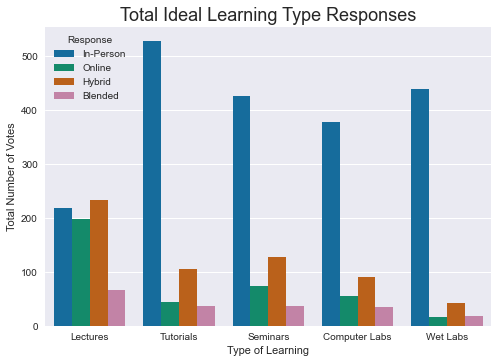

In [90]:
#This preps our new dataframe with just the columns we need to graph
bardata = pd.DataFrame(newdata, columns=['Question', 'Response', 'Count'])
#print(bardata)

#This graphs our barplot with the questions on the x axis, the total count on the y axis, and the response type as the color bars
plt.figure()
sns.barplot(data=bardata, x='Question', hue='Response', y='Count')
plt.style.use("seaborn-colorblind")
plt.xlabel("Type of Learning")
plt.ylabel("Total Number of Votes")
plt.title("Total Ideal Learning Type Responses", fontsize=18)



The above graph shows that participants would ideally prefer in-person tutorials, seminars, computer labs, and wet labs.  This data is supported by the mode.  While the mode for lectures indictates that 3, hybrid, is the most common answer, we can see from the graph that lectures are pretty evenly split between in-person, online, and hybrid modes of learning.  

Blended learning did not receive many votes for any of the categories; this is likely because "hybrid" is the most common phrase used for mixed learning types, and we did not define any distinction between hybrid and blended in the questionnaire.  Participants may be more unfamiliar to "blended" as a phrase and therefore less likely to choose it.  Future questionnaires should define all of these categories explicitly.

The last thing to analyze before moving on to Part 2 is the results of Core GP, a common survey used to assess mental wellbeing.  These may be analyzed within the scope of demographics later as well, but for now lets just try to get an idea of what the general student population was feeling.

In [25]:
#Some of the Core GP questions need to be reverse coded, as some relate to positive aspects and others relate to negative aspects.
#The likert scale measures frequency.
#Here is a list of the questions:
#Positive questions: 1,3,4,6,8,9,14,15
#Negative questions: 2,5,7,10,11,13
#There are less negative questions, so these will be reverse coded.
#Question 12 should be removed - although, since this is the test question, all core GP results that failed to answer this correctly 
#should be dropped.
#Question 12 asks participants to select 2 if they are attentive

#Using the iloc function to get just the columns with the Core GP questions
coreGP = ET.iloc[:,14:29]
print(coreGP)


      CORE-GP_1  CORE-GP_2  CORE-GP_3  CORE-GP_4  CORE-GP_5  CORE-GP_6  \
0           NaN        NaN        NaN        NaN        NaN        NaN   
1           NaN        NaN        NaN        NaN        NaN        NaN   
2           NaN        NaN        NaN        NaN        NaN        NaN   
3           NaN        NaN        NaN        NaN        NaN        NaN   
4           NaN        NaN        NaN        NaN        NaN        NaN   
...         ...        ...        ...        ...        ...        ...   
1137        NaN        NaN        NaN        NaN        NaN        NaN   
1138        2.0        4.0        3.0        3.0        2.0        2.0   
1139        NaN        NaN        NaN        NaN        NaN        NaN   
1140        5.0        4.0        4.0        4.0        2.0        3.0   
1141        4.0        4.0        3.0        4.0        4.0        2.0   

      CORE-GP_7  CORE-GP_8  CORE-GP_9  CORE-GP_10  CORE-GP_11  CORE-GP_VC  \
0           NaN        NaN        

In [26]:
#Lets try to remove question 12 (CORE-GP_VC) first
#This selects only the participants who answered 2 to this question
goodpart = coreGP['CORE-GP_VC'] == 2
coreGPnew = coreGP.copy()[goodpart]
print(coreGPnew)

      CORE-GP_1  CORE-GP_2  CORE-GP_3  CORE-GP_4  CORE-GP_5  CORE-GP_6  \
19          2.0        2.0        2.0        2.0        2.0        2.0   
24          2.0        2.0        2.0        2.0        2.0        2.0   
41          4.0        3.0        5.0        5.0        3.0        4.0   
42          3.0        2.0        4.0        3.0        3.0        4.0   
43          3.0        3.0        3.0        4.0        1.0        4.0   
...         ...        ...        ...        ...        ...        ...   
1134        3.0        5.0        3.0        2.0        3.0        3.0   
1136        1.0        5.0        1.0        2.0        3.0        1.0   
1138        2.0        4.0        3.0        3.0        2.0        2.0   
1140        5.0        4.0        4.0        4.0        2.0        3.0   
1141        4.0        4.0        3.0        4.0        4.0        2.0   

      CORE-GP_7  CORE-GP_8  CORE-GP_9  CORE-GP_10  CORE-GP_11  CORE-GP_VC  \
19          2.0        2.0        

Text(0.5, 0, 'Number of Selections')

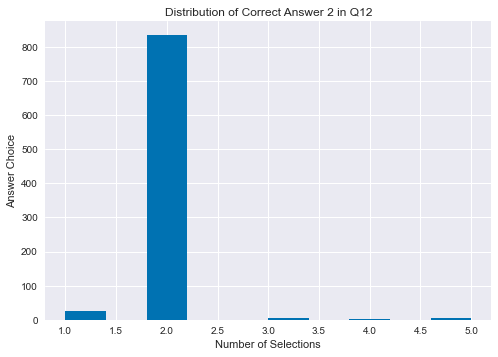

In [27]:
#Checking that the number of rows in the previous data matches the histogram
plt.figure()
plt.hist(coreGP['CORE-GP_VC'])
plt.title('Distribution of Correct Answer 2 in Q12')
plt.ylabel('Answer Choice')
plt.xlabel('Number of Selections')
#It does!

In [28]:
#Now we can start reverse coding
#I should make a loop with a dictionary that changes the values to the reverse
#Negative questions to be made "positive": 2,5,7,10,11,13
#print(coreGPnew)
negquestions = ["CORE-GP_2", "CORE-GP_5", "CORE-GP_7", "CORE-GP_10", "CORE-GP_11", "CORE-GP_12"]
coreGPneg = coreGPnew.loc[goodpart, negquestions]
#Looks right

#Making a dictionary with the reverse coding
coreGPnegdic = {
    1:5,
    2:4,
    3:3,
    4:2,
    5:1
}
#This applies the dictionary to the data   
coreGPneg = coreGPneg.applymap(coreGPnegdic.get)
#This updates the dataframe with the reverse coding values; since the data was SO similar, we could use update instead of merge
coreGPreversed = coreGPnew.copy()
coreGPreversed.update(coreGPneg)
coreGPnew = coreGPreversed



#That worked, the reverse coding has been done on these questions.  Now I need to merge them together while keeping the values from coreGPneg

#now we need to make it 0-4 instead of 1-5... as per the clinical cutoff coding.




In [29]:
coreGPclindic = {
    5:4,
    4:3,
    3:2,
    2:1,
    1:0
}
coreGPnew = coreGPnew.applymap(coreGPclindic.get)
coreGPnew2 = coreGPnew
print(coreGPnew2)

      CORE-GP_1  CORE-GP_2  CORE-GP_3  CORE-GP_4  CORE-GP_5  CORE-GP_6  \
19            1          3        1.0        1.0        3.0        1.0   
24            1          3        1.0        1.0        3.0        1.0   
41            3          2        4.0        4.0        2.0        3.0   
42            2          3        3.0        2.0        2.0        3.0   
43            2          2        2.0        3.0        4.0        3.0   
...         ...        ...        ...        ...        ...        ...   
1134          2          0        2.0        1.0        2.0        2.0   
1136          0          0        0.0        1.0        2.0        0.0   
1138          1          1        2.0        2.0        3.0        1.0   
1140          4          1        3.0        3.0        3.0        2.0   
1141          3          1        2.0        3.0        1.0        1.0   

      CORE-GP_7  CORE-GP_8  CORE-GP_9  CORE-GP_10  CORE-GP_11  CORE-GP_VC  \
19          3.0        1.0        

In [30]:

#and then flip it so higher the number = worse the patient
coreGPclindic2 = {
    0:4,
    1:3,
    2:2,
    4:0,
    3:1
}
coreGPnew2 = coreGPnew2.applymap(coreGPclindic2.get)
coreGPnew3 = coreGPnew2
print(coreGPnew3)

      CORE-GP_1  CORE-GP_2  CORE-GP_3  CORE-GP_4  CORE-GP_5  CORE-GP_6  \
19            3          1        3.0        3.0        1.0        3.0   
24            3          1        3.0        3.0        1.0        3.0   
41            1          2        0.0        0.0        2.0        1.0   
42            2          1        1.0        2.0        2.0        1.0   
43            2          2        2.0        1.0        0.0        1.0   
...         ...        ...        ...        ...        ...        ...   
1134          2          4        2.0        3.0        2.0        2.0   
1136          4          4        4.0        3.0        2.0        4.0   
1138          3          3        2.0        2.0        1.0        3.0   
1140          0          3        1.0        1.0        1.0        2.0   
1141          1          3        2.0        1.0        3.0        3.0   

      CORE-GP_7  CORE-GP_8  CORE-GP_9  CORE-GP_10  CORE-GP_11  CORE-GP_VC  \
19          1.0        3.0        

In [31]:
#Lets drop the VC question entirely before we graph, since it doesn't show any real data
coreGPdropped = coreGPnew3.drop('CORE-GP_VC', axis=1)
coreGPdropped
#Great, now our data is almost ready to be graphed

,CORE-GP_1,CORE-GP_2,CORE-GP_3,CORE-GP_4,CORE-GP_5,CORE-GP_6,CORE-GP_7,CORE-GP_8,CORE-GP_9,CORE-GP_10,CORE-GP_11,CORE-GP_12,CORE-GP_13,CORE-GP_14
19,3,1,3.0,3.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0
24,3,1,3.0,3.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0
41,1,2,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
42,2,1,1.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0
43,2,2,2.0,1.0,0.0,1.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,2,4,2.0,3.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,3.0,2.0,2.0
1136,4,4,4.0,3.0,2.0,4.0,3.0,3.0,2.0,1.0,4.0,2.0,3.0,4.0
1138,3,3,2.0,2.0,1.0,3.0,4.0,3.0,4.0,2.0,3.0,1.0,1.0,4.0
1140,0,3,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0


In [32]:
coreGPnew3 = pd.DataFrame(coreGPnew3)
coreGPnew3.isna().sum()

CORE-GP_1     0
CORE-GP_2     0
CORE-GP_3     4
CORE-GP_4     3
CORE-GP_5     3
CORE-GP_6     1
CORE-GP_7     1
CORE-GP_8     3
CORE-GP_9     2
CORE-GP_10    2
CORE-GP_11    2
CORE-GP_VC    0
CORE-GP_12    2
CORE-GP_13    1
CORE-GP_14    1
dtype: int64

In [33]:
coreind = coreGPnew3.dropna()
coreind = (coreind.sum(axis=1))/14
coreind

#these show the 0-4 scale of core GP averages per individual

19      2.357143
24      2.357143
41      1.071429
42      1.428571
43      1.714286
          ...   
1134    2.285714
1136    3.285714
1138    2.785714
1140    1.571429
1141    2.214286
Length: 821, dtype: float64

In [34]:
coreind = pd.DataFrame(coreind)
coreind = coreind.rename(columns = {0:'Avg'})
print(coreind)

           Avg
19    2.357143
24    2.357143
41    1.071429
42    1.428571
43    1.714286
...        ...
1134  2.285714
1136  3.285714
1138  2.785714
1140  1.571429
1141  2.214286

[821 rows x 1 columns]


In [35]:
#How many individuals were below clinical cutoff (<1)?

coreindresults = (coreind[coreind.Avg < 1]).count()
print(coreindresults)
#total is 55 out of 821
coreindresults2 = (coreind[coreind.Avg < 2]).count()
print(coreindresults2)
coreindresults3 = (coreind[coreind.Avg < 3]).count()
print(coreindresults3)
coreindresults4 = (coreind[coreind.Avg < 4]).count()
print(coreindresults4)
coreindresults5 = (coreind[coreind.Avg < 5]).count()
print(coreindresults5)

Avg    55
dtype: int64
Avg    378
dtype: int64
Avg    725
dtype: int64
Avg    820
dtype: int64
Avg    821
dtype: int64


In [36]:
# 55, 323, 347, 96

In [37]:
!pip install squarify
import squarify


  Using cached squarify-0.4.3-py3-none-any.whl (4.3 kB)


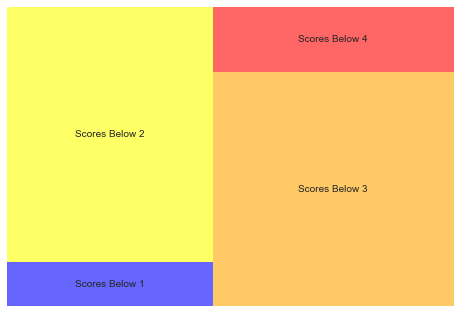

In [38]:
sizes=[55, 323, 347, 96]
label=["Scores Below 1", "Scores Below 2", "Scores Below 3", "Scores Below 4"]
color=['blue','yellow','orange','red']
squarify.plot(sizes=sizes, label=label, color=color, alpha=0.6 )
plt.axis('off')
plt.show()

In [39]:
import matplotlib.patches as mpatches


In [40]:
#If we want to plot the average scores, we need to get the averages and add it as a column 
coreGPnewmean = coreGPdropped.mean()
coreGPnewmean

CORE-GP_1     1.906475
CORE-GP_2     2.696643
CORE-GP_3     1.927711
CORE-GP_4     1.929001
CORE-GP_5     1.398315
CORE-GP_6     1.921969
CORE-GP_7     1.983193
CORE-GP_8     1.439230
CORE-GP_9     1.562500
CORE-GP_10    1.181490
CORE-GP_11    2.206731
CORE-GP_12    1.585337
CORE-GP_13    2.236495
CORE-GP_14    1.842737
dtype: float64

In [41]:
#Defining a function to crop the "CORE-GP" out of the question name.  A function is needed to map it to the series index.
def getquestnumber(str):
    return str[str.find('_')+1:]

In [42]:
#This is to correct the value names for the questions following question 12 (which was excluded).  This way, they will correspond to their
#actual question number within the questionnaire
def offsetvalues(value):
    value = int(value)
    if value > 11:
        value += 1
    return str(value)

In [43]:
#This maps the graph indexes and offsetvalues to the dataframe to apply them
coreGPnewgraph = coreGPnewmean.copy()
coreGPnewinter = coreGPnewgraph.index.map(getquestnumber)
coreGPnewgraph.index = coreGPnewinter.map(offsetvalues)

(0.0, 4.0)

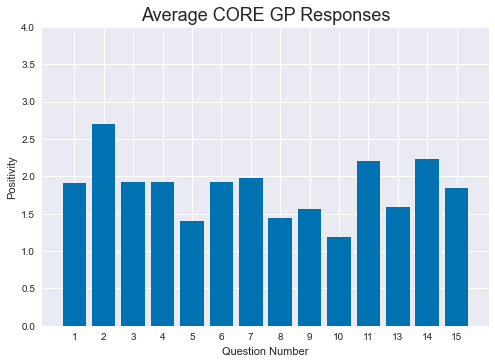

In [44]:
#Graphing a barplot of the average CORE GP responses per question number
plt.figure()
plt.bar(x=coreGPnewgraph.index, height=coreGPnewgraph)
plt.style.use("seaborn-deep")
plt.xlabel("Question Number")
plt.ylabel("Positivity")
plt.title("Average CORE GP Responses", fontsize=18)
plt.ylim(0,4)

#It's important to remember that since the negative questions were reversed coded, this graph is showing the frequency of positivity rates 
#among students during the relevant semester.  3 in this case is again neutral - the results show that almost all the scores are close to 3.

Since the datasets (ETnames and ET) did not include the names of these questions, I will put them below:
1) I felt that I had someone to turn to for support when needed.
2) I felt tense, anxious or nervous.
3) I felt O.K. about myself
4) I felt able to cope when things went wrong.
5) I was troubled by aches, pains or physical problems.
6) I was happy with the things I did.
7) I had difficulty getting to sleep or staying sleep.
8) I felt warmth or affection for someone.
9) I was able to do most things I needed to.
10) I felt criticized by other people.
11) I felt unhappy.
12) I've been reading this survey carefully and I will select 'only occasionally' as my response to this question.
13) I was irritable when with other people.
14) I felt optimistic about my future.
15) I achieved the things I wanted to.

Note that 12 was omitted from the graph as it was only there to measure the accuracy of participants' responses.

Since negative questions are reverse coded, the lower the bar = the more negative the average response, the higher the bar = the more positive the response (for all questions).  In addition to this, reverse coding the questions also means that the graph no longer displays frequency, and instead displays "positivity".  The actual data is related to how frequent participants felt each statement was true, though.

Based on the graph, students on average felt tense, anxious, and nervous more often.  
On the other hand, students did not feel criticized by other people very often.

These results do not say much on their own, but will serve as a marker for how students were feeling during semester 2 of the 2020-2021 academic year.  Future questions that include Core GP questions will be able to compare to this time, and measure changes in student wellbeing.


Part 2: Demographic Information

In this section we are trying to answer the question: How were different cohorts affected?

In [45]:
#First we need to prep the original dataset.

#This dataframe holds all of the demographic information.
#It will be interesting to do analyses with just some of these questions, but I will also use the full dataframe that includes
#some of the averages from our previous work so that we can compare the demographics within the scope of that info too.
ETdemo = ET.iloc[:,3:14]

ETdemo

,Question 1,Question 2,Q8,Q9,Q10,Q11,Q51,Question 3,Q61_1,Q61_2,Q61_3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,3,2.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1137,"20,6,8,14,11",4.0,2,2.0,"5,12",4.0,NaN,2.0,NaN,NaN,NaN
1138,"20,14",1.0,1,2.0,24,4.0,NaN,2.0,1.0,NaN,NaN
1139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1140,"20,6,7",2.0,"1,4,8,10",2.0,"20,21",5.0,NaN,2.0,NaN,NaN,NaN


In [46]:
#This function splits the string groups of numbers (ex: 10,19,1) so that the dictionary below will actually work on them
def getdemotext(numbers):
    numlist = numbers.split(",")
    strlist = []
    for num in numlist:
        strlist.append(ETdemoQ1dic.get(int(num)))
    return ",".join(strlist)

In [47]:
#Dropping the participants who did not answer demographic groups so the NaN doesn't interfere with graphing.  Also, "15" was not tied to any
#demographic but somehow appeared in the data once (no idea how this happened) and this code dropped the nonsense row.
ETdemo1 = ETdemo[~ETdemo['Question 1'].str.contains("15", na=False)]

ETdemo1 = ETdemo1.rename(columns={"Question 1": "Question_1"})

ETdemo1 = ETdemo1[ETdemo1.Question_1 != '19']

ETdemo1 = ETdemo1.rename(columns={"Question_1": "Question 1"})

ETdemoQ1 = ETdemo1['Question 1'].dropna()

#Note - the ETnames dataframe doesn't contain any useful captions for this question, so I will need to list the demographic categories manually
#Making a dictionary with the demographic titles.  Qualtrics messed up the numbering, which is why all the numbers are seemingly random.
#I manually matched the titles to the response ID and made sure I found the corresponding number for each identity, so these are correct.
ETdemoQ1dic = {
    20:"Undergraduate", 
    1:"Postgraduate Taught", 
    3:"Working Students", 
    4:"Mature Students", 
    13:"Commuting Students", 
    16:"Care Experienced",
    5:"BAME Students", 
    6:"LGBTQIA Students", 
    7:"International Students", 
    8:"Remote Learning Students", 
    18:"Foundation Course Students",
    17:"Evening Degree Students",
    9:"Students with Learning Disabilities",
    10:"Students with Physical Disabilities",
    14:"Neurodivergent Students", 
    11:"Students with Mental Health Disabilities", 
    12:"Students with Other Disabilities" 
}

#This maps the dictionary to the values within the dataframe
ETdemoQ1 = ETdemoQ1.map(getdemotext)
ETdemoQ1

41                   Undergraduate,International Students
42      Postgraduate Taught,Mature Students,LGBTQIA St...
43                   Undergraduate,International Students
44      Undergraduate,Working Students,Commuting Students
45                   Undergraduate,International Students
                              ...                        
1136    Undergraduate,LGBTQIA Students,International S...
1137    Undergraduate,LGBTQIA Students,Remote Learning...
1138                Undergraduate,Neurodivergent Students
1140    Undergraduate,LGBTQIA Students,International S...
1141                                     Working Students
Name: Question 1, Length: 953, dtype: object

In [48]:
#Now lets take a look at how many participants in each demographic group we have...

#This loop counts the number of demographic categories in each row to determine the value counts category by category.  The count is taken
#so that we can get the total number of each category.  The loop allows us to get this number for each category without cancelling out the
#overlapping values.
ETbardemo = []
for category in ETdemoQ1dic.values():
    ETfiltered = ETdemoQ1[ETdemoQ1.str.contains(category)]
    ETbardemo.append(ETfiltered.count())

In [49]:
#This turns the list into a series so that we can use the values from the dictionary above as the indices    
ETseries = pd.Series(data = ETbardemo, index=list(ETdemoQ1dic.values()))

In [50]:
#This turns the series back into a dataframe to make it easier to graph
ETdemdatF = ETseries.to_frame()

In [51]:
#Renaming a column from 0 so that it stops messing up my code later on
ETdemdatF = ETdemdatF.rename(columns={0:"DemoCounts"})
print(ETdemdatF)

                                          DemoCounts
Undergraduate                                    807
Postgraduate Taught                              132
Working Students                                 147
Mature Students                                   38
Commuting Students                                53
Care Experienced                                   9
BAME Students                                     82
LGBTQIA Students                                 217
International Students                           298
Remote Learning Students                         196
Foundation Course Students                         9
Evening Degree Students                           15
Students with Learning Disabilities               60
Students with Physical Disabilities               22
Neurodivergent Students                           70
Students with Mental Health Disabilities         167
Students with Other Disabilities                  20


In [52]:
#Lets do the same for school counts
#ETdemoQ10 = ETdemoQ10.dropna()
#print(ETdemoQ10)
#ETschool = []
#for category in ETdemoQ10dic.values():
    #ETfiltered = ETdemoQ10[ETdemoQ10.str.contains(category)]
    #ETschool.append(ETfiltered.count())
#ETseries = pd.Series(data = ETschool, index=list(ETdemoQ10dic.values()))
#ETschdat = ETseries.to_frame()
#ETschdat = ETschdat.rename(columns={0:"School Counts"})
#print(ETschdat)

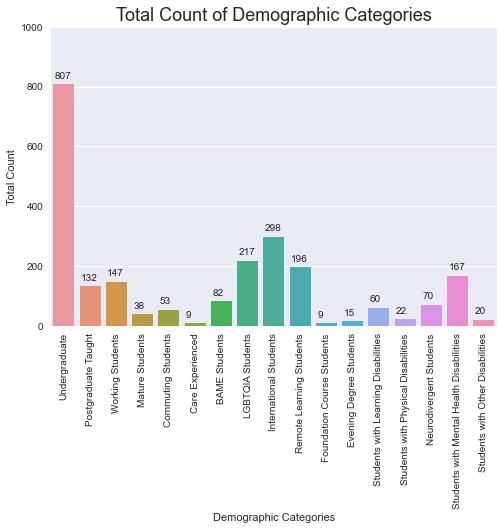

In [53]:
#Plotting a barplot that shows the total counts of each demographic category.  Some of these are overlapping (the same people can count multiple
#times for different demographics) so it is not a representation of how many individuals the data shows independently.
plt.figure()
sns.barplot(data=ETdemdatF, x=ETdemdatF.index, y="DemoCounts")
plt.xlabel("Demographic Categories")
plt.ylabel("Total Count")
plt.ylim(0,1000)
plt.title("Total Count of Demographic Categories", fontsize=18)
plt.xticks(rotation=90)

#This loop is for getting the text values to appear on the top of the bars
for index, value in enumerate(ETdemdatF["DemoCounts"]):
    plt.text(y=value+20, x=index-.35, s=str(value))

This graph is interesting; many of the demographic categories do not have a large sample size (care experienced, foundation course, GOYO).  However, this doesn't necessarily mean that they should be excluded from the data.  It is impossible to know whether this sample size is representative without knowing the total number of these students at the University.  For example, 9 care experienced students does not seem like very many.  However, if there are only 20 care experienced students in the University, this sample becomes a decent number to represent the group.

There is also the issue of plotting these demographics together later on; the scale of some groups may disrupt the results of other groups visually.  Unfortunately, until I get the total population size numbers (which I am in the process of acquiring), I will need to dispaly it this way.  After getting the population data, I can take the sample sizes as a percentage of their respective population and use that value to get a much more accurate idea of how representative the results are.

So, the main takeaway from this data is: proceed with caution when analyzing the rest of the results related to demographics.

In [54]:
#Now I will try to replace ETdemoQ1 into ETdemo so that the named question library appears in the main demographic dataframe
ETdemonew = ET.copy()
ETdemonew['Question 1'] = ETdemoQ1
#Lets see if we can look at some of the later questions through the scope of question 1 demographics

#Dropping the null values again

ETdemonew = ETdemonew.rename(columns={"Question 1": "Question_1"})

ETdemonew = ETdemonew[ETdemonew.Question_1 != 'GOYO Students']

ETdemonew = ETdemonew.rename(columns={"Question_1": "Question 1"})

ETdemonew = ETdemonew[ETdemonew['Question 1'].notnull()]

#Making the new indexes for a dataframe we will make later - we want the indexes of our dataframe to be all the possible combinations 
#of the demographic categories and Likert Scale answers, therefore we use a multi-index dataframe
ETmultiindex = pd.MultiIndex.from_product([ETdemoQ1dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])


#We will need to go through one subquestion at a time due to the sheer amount of data we are looking at
ETfiltered = ETdemonew[['Question 1', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 
                        'Q13_12', 'Q13_13', 'Q13_14', 'Q13_15', 'Q13_16', 'Q13_17', 'Q13_18', 'Q13_19']]

#This dictionary stores our values for the final dataframe
valuecountsdict = {}

#creates a list containing the names of the demographic categories
categories = ETdemoQ1dic.values()

#This loops through all of the questions in the filtered dataframe
for column in ETfiltered.columns:
    #This column contains the demographic answers, so we don't want to get the mean of this.  The continue statement moves on to the next iteration
    #of the loop if it reaches question 1
    if column == 'Question 1':
        continue
    
    means = []
    # We loop through all the demographics in the questionnaire, setting 'category' to be the demographic we are currently looking at 
    # in each iteration of the loop
    for category in  ETdemoQ1dic.values():
        #This filters by all answers that contain the demographic category name (i.e. all people who selected this demographic)
        ETdoublefiltered = ETfiltered[ETfiltered['Question 1'].str.contains(category)]
        #Numeric_only stops trying to take means of strings, which was previously causing errors
        ETtriplefiltered = ETdoublefiltered[column]
        #This adds the item (the mean) to the end of the list
        means.append(ETtriplefiltered.mean())
    #Turning the list back into a dataframe
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    
    
    #We don't want a million outputs - let's try to use the z-score to get only the outputs that are interesting.
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    #print(column, ETtripleplotZ)
    #This will filter out all the columns that do not have a z score above 2.5.  In this way, the only values in this series are ones
    #that have "significant" results according to z-score, i.e. columns that have averages that are higher/lower than average to a 
    #noticable degree.
    
    
    #Writing a dictionary to get the question names.  It was faster than trying to loop with ETnames like before.
    ETtripledic = {
        "Q13_1":"Live online lectures", 
        "Q13_2":"Recorded lectures", 
        "Q13_3":"Live online tutorials", 
        "Q13_4":"Recorded tutorials", 
        "Q13_5":"Live online labs/practicals", 
        "Q13_6":"Recorded labs/practicals",
        "Q13_7":"Live online seminars", 
        "Q13_8":"Recorded seminars", 
        "Q13_9":"Accessing library resources", 
        "Q13_10":"Schedule flexibility", 
        "Q13_11":"Online examinations",
        "Q13_12":"Function of devices/wifi/online platforms",
        "Q13_13":"Online group work",
        "Q13_14":"University sources for academic support",
        "Q13_15":"Feelings of belonging/identity within school",
        "Q13_16":"Feelings of belonging/identity within University", 
        "Q13_17":"Online learning materials", 
        "Q13_18":"Online reading lists",
        "Q13_19":"Ability to study fully online"
    }
    
    #this plots the graphs as long as ETtripleplotZ is not empty
    #ETtripleplotZ is only empty if there are no significant values
    if not ETtripleplotZ.empty:
        
        plt.figure()
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Demographic Categories")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=18)
        plt.xticks(rotation=90)
        #The axhline displays at 3, the neutral category. This highlights the distance from neutral better.
        plt.axhline(3)



The above graphs show the differences in demographic categories' average likert responses to several academic questions that were found to be significant via the z-score method.

The likert scale goes from 1 (Extremely disatisfied) to 5 (extremely satisfied), making higher scores more positive and lower scores more negative.

Note: GOYO students had a very small sample size, and therefore their averages may be polarized by a single participants's opinion.  Future analyses would need to either 1) know how well this sample represents the total population of GOYO students, or 2) remove this group from the study.

- For recorded lectures: mature students, commuting students, GOYO students, and evening degree students rated this particularly high.

- For live online tutorials: mature students, GOYO students, and evening degree students rated this particularly high; students with learning disabilities rated this particularly low.

- For live online labs/practicals: GOYO students rated this particularly high; foundation course students rated this particularly low.

- For recorded labs/practicals: foundation course students rated this particularly low.

- For schedule flexibility of online learning: GOYO students rated this particularly high.

- For online exams: GOYO students rated this particularly high; care experienced students rated this particularly low.

- For online group work: GOYO students rated this particularly high; all groups of students with disabilities rated this particularly low.

- For belonging/identity within the university: GOYO students, foundation course students, evening degree students, and mature student rated this higher than average.

- For online learning materials: GOYO students, evening degree students, mature students, and commuting students rated this particularly high.

- For online reading lists: GOYO students rated this particularly high.

- For the ability to study fully online: GOYO students and evening degree students rated this particularly high; foundation course students rated this particularly low

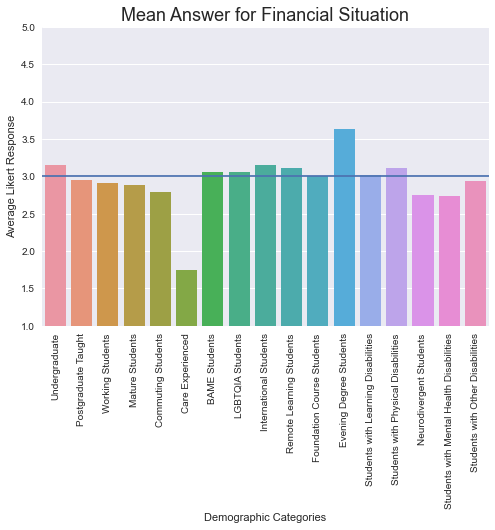

In [55]:
#Lets do this again for wellbeing by copying the code and just changing what we need
#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!

ETdemonew = ET.copy()
ETdemonew['Question 1'] = ETdemoQ1


ETdemonew = ETdemonew.rename(columns={"Question 1": "Question_1"})

ETdemonew = ETdemonew[ETdemonew.Question_1 != 'GOYO Students']

ETdemonew = ETdemonew.rename(columns={"Question_1": "Question 1"})
ETdemonew = ETdemonew[ETdemonew['Question 1'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ1dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Question 1', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9']]

valuecountsdict = {}

categories = ETdemoQ1dic.values()
for column in ETfiltered.columns:
    if column == 'Question 1':
        continue
    
    means = []
    for category in  ETdemoQ1dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Question 1'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})

    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    
    ETtripledic = {
        "Q18_1":"Socio-political circumstances", 
        "Q18_2":"Financial Situation", 
        "Q18_3":"Accommodation Situation", 
        "Q18_4":"Home environment", 
        "Q18_5":"Exercise", 
        "Q18_6":"University resources for support",
        "Q18_7":"Study/work environment", 
        "Q18_8":"Community support", 
        "Q18_9":"Support from family and/or friends", 
    }
    
    if not ETtripleplotZ.empty:
        plt.figure()
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Demographic Categories")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=18)
        plt.xticks(rotation=90)
        plt.axhline(3)


The above graphs show the differences in demographic categories' average likert responses to several wellbeing questions that were found to be significant via the z-score method.

The likert scale goes from 1 (Extremely disatisfied) to 5 (extremely satisfied), making higher scores more positive and lower scores more negative.

The questions are asking about the affect of each topic (example: financial situation) on the participant's wellbeing.

- For financial situation: evening degree students scored particularly high; care experienced students scored particularly low.

- For exercise: GOYO students scored particularly low.

- For study/work environment: GOYO students scored particularly high; care experienced students scored particularly low.

In [56]:
#Repeating the code for the last set of questions - the social category
#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!

ETdemonew = ET.copy()
ETdemonew['Question 1'] = ETdemoQ1


ETdemonew = ETdemonew.rename(columns={"Question 1": "Question_1"})

ETdemonew = ETdemonew[ETdemonew.Question_1 != 'GOYO Students']

ETdemonew = ETdemonew.rename(columns={"Question_1": "Question 1"})
ETdemonew = ETdemonew[ETdemonew['Question 1'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ1dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Question 1', 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q33_6', 'Q33_7', 'Q33_8']]

valuecountsdict = {}

categories = ETdemoQ1dic.values()
for column in ETfiltered.columns:
    if column == 'Question 1':
        continue
    
    means = []
    for category in  ETdemoQ1dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Question 1'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
   
    ETtripledic = {
        "Q33_1":"Online society events", 
        "Q33_2":"Online union-run events", 
        "Q33_3":"Online school-run events", 
        "Q33_4":"Online residence-run events", 
        "Q33_5":"Formal/informal online groups/chats for students", 
        "Q33_6":"Online society groups/chats",
        "Q33_7":"Peer interactions in academic settings", 
        "Q33_8":"Icebreaking/friend-making events" 
    }
  
    if not ETtripleplotZ.empty:
        plt.figure()
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Demographic Categories")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=18)
        plt.xticks(rotation=90)
        plt.axhline(3)


The above graphs show the differences in demographic categories' average likert responses to several social questions that were found to be significant via the z-score method.

- The likert scale goes from 1 (Extremely disatisfied) to 5 (extremely satisfied), making higher scores more positive and lower scores more negative.

- For online school-run events: GOYO students scored particularly high; care experienced students scored particularly low.

- For online residence-run events: Care experienced students and GOYO students scored particularly low.

- For online group chats: GOYO students scored particularly high, and care experienced students scored particularly low.

The above sections output graphs only for data that includes a column(bar) with a z-score above 2.5 (my verison of "significant" in this case).  There are a few problems with this method that I would like to acknowledge here:

1) The z-score value I picked to divide significance and non-significance is completely arbitrary.  I could have used a higher or lower number to get different outputs.  I only settled on 2.5 because it gave roughly the amount of output graphs that I wanted to deal with analyzing.  I recognize that this is not ideal, but I did it because analyzing the actual number of graphs would have been too much, and I had to draw this arbitrary boundary somewhere.

However, I would like to defend this decision: since these are not inferential statistics, and I am just using this method to get a feel for how the data is presenting in order to know which directions to take further analyses, the use of arbitrary z-score for the sake of simplicity is not dire.

2) The z-score includes demographic columns with very small dataframes (i.e. GOYO students).

This will hopefully be fixed when I get the total population size numbers and can accurately evaluate whether these samples are of representative size.

3) Using the z-score compares demographics to other demographics, and not to the averages of all groups as a whole.  This is obviously not the best way to calculate this for accuracies sake.  It is possible that the majority of these demographic groups are all lower/higher than average scores in some categories.

Hopefully by including undergraduate/postgraduate categories in this section, the data is a little balanced out.  Again, the z-score method was used for the sake of simplicity and these issues are not to be overlooked in further analyses.

In [57]:
#The last thing to do is to analyze the other identities.  Some of these don't need to be analyzed through the scope of the academic/wellbeing/social
#questions, and some do.  Lets start with the ones that do.

#The ones that dont need further analysis: previous online experience, struggle financially, financial support, study abroad
#The ones that do need further analysis: gender, accommodation, year of study, school

#starting with gender / academics

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!

ETdemonew = ET.copy()
ETdemoQ2 = ETdemonew['Question 2'] 

ETdemoQ2dic = {
    1:"Male", 
    2:"Female", 
    3:"Other", 
    4:"Non-binary/third gender", 
    5:"Prefer not to say"
    
}

ETdemoQ2 = ETdemoQ2.map(ETdemoQ2dic.get)


ETdemonew = ET.copy()
ETdemonew['Question 2'] = ETdemoQ2

ETdemonew = ETdemonew[ETdemonew['Question 2'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ2dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Question 2', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 
                        'Q13_12', 'Q13_13', 'Q13_14', 'Q13_15', 'Q13_16', 'Q13_17', 'Q13_18', 'Q13_19']]

valuecountsdict = {}

categories = ETdemoQ2dic.values()
for column in ETfiltered.columns:
    if column == 'Question 2':
        continue
    
    means = []
    for category in  ETdemoQ2dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Question 2'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
   
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]

    ETtripledic = {
        "Q13_1":"Live online lectures", 
        "Q13_2":"Recorded lectures", 
        "Q13_3":"Live online tutorials", 
        "Q13_4":"Recorded tutorials", 
        "Q13_5":"Live online labs/practicals", 
        "Q13_6":"Recorded labs/practicals",
        "Q13_7":"Live online seminars", 
        "Q13_8":"Recorded seminars", 
        "Q13_9":"Accessing library resources", 
        "Q13_10":"Schedule flexibility", 
        "Q13_11":"Online examinations",
        "Q13_12":"Function of devices/wifi/online platforms",
        "Q13_13":"Online group work",
        "Q13_14":"University sources for academic support",
        "Q13_15":"Feelings of belonging/identity within school",
        "Q13_16":"Feelings of belonging/identity within University", 
        "Q13_17":"Online learning materials", 
        "Q13_18":"Online reading lists",
        "Q13_19":"Ability to study fully online"
    }
    
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(3,3))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Gender")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.xticks(rotation=90)
        plt.axhline(3)

In [58]:
#Below codes the graphs for gender / wellbeing

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!

ETdemonew = ET.copy()
ETdemoQ2 = ETdemonew['Question 2'] 

ETdemoQ2dic = {
    1:"Male", 
    2:"Female", 
    3:"Other", 
    4:"Non-binary/third gender", 
    5:"Prefer not to say"
    
}

ETdemoQ2 = ETdemoQ2.map(ETdemoQ2dic.get)

ETdemonew = ET.copy()
ETdemonew['Question 2'] = ETdemoQ2

ETdemonew = ETdemonew[ETdemonew['Question 2'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ2dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Question 2', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9']]

valuecountsdict = {}

categories = ETdemoQ2dic.values()
for column in ETfiltered.columns:
    if column == 'Question 2':
        continue
    
    means = []
    for category in  ETdemoQ2dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Question 2'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    
    ETtripledic = {
        "Q18_1":"Socio-political circumstances", 
        "Q18_2":"Financial Situation", 
        "Q18_3":"Accommodation Situation", 
        "Q18_4":"Home environment", 
        "Q18_5":"Exercise", 
        "Q18_6":"University resources for support",
        "Q18_7":"Study/work environment", 
        "Q18_8":"Community support", 
        "Q18_9":"Support from family and/or friends", 
    }
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(3,3))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Gender")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.xticks(rotation=90)
        plt.axhline(3)

In [59]:
#Below is the code for gender / social

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!

ETdemonew = ET.copy()
ETdemoQ2 = ETdemonew['Question 2'] 

ETdemoQ2dic = {
    1:"Male", 
    2:"Female", 
    3:"Other", 
    4:"Non-binary/third gender", 
    5:"Prefer not to say"
    
}

ETdemoQ2 = ETdemoQ2.map(ETdemoQ2dic.get)

ETdemonew = ET.copy()
ETdemonew['Question 2'] = ETdemoQ2

ETdemonew = ETdemonew[ETdemonew['Question 2'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ2dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Question 2', 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q33_6', 'Q33_7', 'Q33_8']]

valuecountsdict = {}

categories = ETdemoQ2dic.values()
for column in ETfiltered.columns:
    if column == 'Question 2':
        continue
    
    means = []
    for category in  ETdemoQ2dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Question 2'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    
    ETtripledic = {
        "Q33_1":"Online society events", 
        "Q33_2":"Online union-run events", 
        "Q33_3":"Online school-run events", 
        "Q33_4":"Online residence-run events", 
        "Q33_5":"Formal/informal online groups/chats for students", 
        "Q33_6":"Online society groups/chats",
        "Q33_7":"Peer interactions in academic settings", 
        "Q33_8":"Icebreaking/friend-making events" 
    }
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(3,3))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Gender")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.xticks(rotation=90)
        plt.axhline(3)

It appears as though none of the gender graphs reached significance at the z-score value of 2.5.  I did try adjusting this value (to, for example, 1.5).  However, when this is done, I go from getting no graphs to getting a large number.  This makes me think that these graphs are genuinely not significant; but again, the issues with z-scores highlighted above are still at play here.

In [60]:
#Next we are looking at accommodation type:

#First lets look at accommodation / academic

# This function takes either a number or list of numbers, and returns the string representation(s) of the numbers as shown in the dictionary
# ETdemoQ8dic. While the list of numbers is a comma-seperated string, a single number is treated as a float
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ8dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ8dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!
ETdemonew = ET.copy()
ETdemoQ8 = ETdemonew['Q8'] 

ETdemoQ8dic = {
    1:"in St Andrews", 
    10:"with family", 
    2:"at home, UK", 
    4:"at home, International", 
    5:"Private accommodation",
    6:"in halls",
    7:"alone",
    8:"with friends"
    
}

ETdemoQ8 = ETdemoQ8.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q8'] = ETdemoQ8

ETdemonew = ETdemonew[ETdemonew['Q8'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ8dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q8', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 
                        'Q13_12', 'Q13_13', 'Q13_14', 'Q13_15', 'Q13_16', 'Q13_17', 'Q13_18', 'Q13_19']]

valuecountsdict = {}

categories = ETdemoQ8dic.values()
for column in ETfiltered.columns:
    if column == 'Q8':
        continue
    
    means = []
    for category in  ETdemoQ8dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q8'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    
    ETtripledic = {
        "Q13_1":"Live online lectures", 
        "Q13_2":"Recorded lectures", 
        "Q13_3":"Live online tutorials", 
        "Q13_4":"Recorded tutorials", 
        "Q13_5":"Live online labs/practicals", 
        "Q13_6":"Recorded labs/practicals",
        "Q13_7":"Live online seminars", 
        "Q13_8":"Recorded seminars", 
        "Q13_9":"Accessing library resources", 
        "Q13_10":"Schedule flexibility", 
        "Q13_11":"Online examinations",
        "Q13_12":"Function of devices/wifi/online platforms",
        "Q13_13":"Online group work",
        "Q13_14":"University sources for academic support",
        "Q13_15":"Feelings of belonging/identity within school",
        "Q13_16":"Feelings of belonging/identity within University", 
        "Q13_17":"Online learning materials", 
        "Q13_18":"Online reading lists",
        "Q13_19":"Ability to study fully online"
    }
    
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(3,3))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Accommodation ")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.xticks(rotation=90)
        plt.axhline(3)

In [61]:
#Next lets look at accommodation / wellbeing

# This function takes either a number or list of numbers, and returns the string representation(s) of the numbers as shown in the dictionary
# ETdemoQ8dic. While the list of numbers is a comma-seperated string, a single number is treated as a float
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ8dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ8dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!
ETdemonew = ET.copy()
ETdemoQ8 = ETdemonew['Q8'] 

ETdemoQ8dic = {
    1:"in St Andrews", 
    10:"with family", 
    2:"at home, UK", 
    4:"at home, International", 
    5:"Private accommodation",
    6:"in halls",
    7:"alone",
    8:"with friends"
    
}

ETdemoQ8 = ETdemoQ8.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q8'] = ETdemoQ8

ETdemonew = ETdemonew[ETdemonew['Q8'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ8dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q8', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9']]

valuecountsdict = {}

categories = ETdemoQ8dic.values()
for column in ETfiltered.columns:
    if column == 'Q8':
        continue
    
    means = []
    for category in  ETdemoQ8dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q8'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 2.5*ETtripleplot['Mean'].std())]
  
    ETtripledic = {
        "Q18_1":"Socio-political circumstances", 
        "Q18_2":"Financial Situation", 
        "Q18_3":"Accommodation Situation", 
        "Q18_4":"Home environment", 
        "Q18_5":"Exercise", 
        "Q18_6":"University resources for support",
        "Q18_7":"Study/work environment", 
        "Q18_8":"Community support", 
        "Q18_9":"Support from family and/or friends", 
    }
    
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(3,3))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Accommodation ")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.xticks(rotation=90)
        plt.axhline(3)

In [62]:
#Finally lets look at accommodation / social

# This function takes either a number or list of numbers, and returns the string representation(s) of the numbers as shown in the dictionary
# ETdemoQ8dic. While the list of numbers is a comma-seperated string, a single number is treated as a float
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ8dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ8dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!
ETdemonew = ET.copy()
ETdemoQ8 = ETdemonew['Q8'] 

ETdemoQ8dic = {
    1:"in St Andrews", 
    10:"with family", 
    2:"at home, UK", 
    4:"at home, International", 
    5:"Private accommodation",
    6:"in halls",
    7:"alone",
    8:"with friends"
    
}

ETdemoQ8 = ETdemoQ8.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q8'] = ETdemoQ8

ETdemonew = ETdemonew[ETdemonew['Q8'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ8dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q8', 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q33_6', 'Q33_7', 'Q33_8']]

valuecountsdict = {}

categories = ETdemoQ8dic.values()
for column in ETfiltered.columns:
    if column == 'Q8':
        continue
    
    means = []
    for category in  ETdemoQ8dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q8'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
   
    ETtripledic = {
        "Q33_1":"Online society events", 
        "Q33_2":"Online union-run events", 
        "Q33_3":"Online school-run events", 
        "Q33_4":"Online residence-run events", 
        "Q33_5":"Formal/informal online groups/chats for students", 
        "Q33_6":"Online society groups/chats",
        "Q33_7":"Peer interactions in academic settings", 
        "Q33_8":"Icebreaking/friend-making events" 
    }
    
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(3,3))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Accommodation ")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.xticks(rotation=90)
        plt.axhline(3)

It appears as though none of the accommodation type graphs reached significance at the z-score value of 2.5. This makes me think that these graphs are genuinely not significant; but again, the issues with z-scores highlighted above are still at play here.

In [63]:
#Just placing this here again so I dont need to scroll up 
#The ones that dont need further analysis: previous online experience, struggle financially, financial support, study abroad
#The ones that do need further analysis: gender, accommodation, year of study, school

#Lets look at year of study / academic

# This function takes either a number or list of numbers, and returns the string representation(s) of the numbers as shown in the dictionary
# ETdemoQ11dic. While the list of numbers is a comma-seperated string, a single number is treated as a float
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ11dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ11dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!
ETdemonew = ET.copy()
ETdemoQ11 = ETdemonew['Q11'] 

ETdemoQ11dic = {
    1:"1st", 
    4:"2nd", 
    5:"3rd", 
    6:"4th", 
    7:"5th",
    9:"PGT"
    
}

ETdemoQ11 = ETdemoQ11.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q11'] = ETdemoQ11

ETdemonew = ETdemonew[ETdemonew['Q11'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ11dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q11', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 
                        'Q13_12', 'Q13_13', 'Q13_14', 'Q13_15', 'Q13_16', 'Q13_17', 'Q13_18', 'Q13_19']]

valuecountsdict = {}

categories = ETdemoQ11dic.values()
for column in ETfiltered.columns:
    if column == 'Q11':
        continue
    
    means = []
    for category in  ETdemoQ11dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q11'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    
    ETtripledic = {
        "Q13_1":"Live online lectures", 
        "Q13_2":"Recorded lectures", 
        "Q13_3":"Live online tutorials", 
        "Q13_4":"Recorded tutorials", 
        "Q13_5":"Live online labs/practicals", 
        "Q13_6":"Recorded labs/practicals",
        "Q13_7":"Live online seminars", 
        "Q13_8":"Recorded seminars", 
        "Q13_9":"Accessing library resources", 
        "Q13_10":"Schedule flexibility", 
        "Q13_11":"Online examinations",
        "Q13_12":"Function of devices/wifi/online platforms",
        "Q13_13":"Online group work",
        "Q13_14":"University sources for academic support",
        "Q13_15":"Feelings of belonging/identity within school",
        "Q13_16":"Feelings of belonging/identity within University", 
        "Q13_17":"Online learning materials", 
        "Q13_18":"Online reading lists",
        "Q13_19":"Ability to study fully online"
    }
    
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(4,4))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Year of Study")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.axhline(3)

In [64]:
#Year of study / wellbeing
# This function takes either a number or list of numbers, and returns the string representation(s) of the numbers as shown in the dictionary
# ETdemoQ11dic. While the list of numbers is a comma-seperated string, a single number is treated as a float
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ11dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ11dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!
ETdemonew = ET.copy()
ETdemoQ11 = ETdemonew['Q11'] 

ETdemoQ11dic = {
    1:"1st", 
    4:"2nd", 
    5:"3rd", 
    6:"4th", 
    7:"5th",
    9:"PGT"
    
}

ETdemoQ11 = ETdemoQ11.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q11'] = ETdemoQ11

ETdemonew = ETdemonew[ETdemonew['Q11'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ11dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q11', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9']]

valuecountsdict = {}

categories = ETdemoQ11dic.values()
for column in ETfiltered.columns:
    if column == 'Q11':
        continue
    
    means = []
    for category in  ETdemoQ11dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q11'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
   
    ETtripledic = {
        "Q18_1":"Socio-political circumstances", 
        "Q18_2":"Financial Situation", 
        "Q18_3":"Accommodation Situation", 
        "Q18_4":"Home environment", 
        "Q18_5":"Exercise", 
        "Q18_6":"University resources for support",
        "Q18_7":"Study/work environment", 
        "Q18_8":"Community support", 
        "Q18_9":"Support from family and/or friends", 
    }
    
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(4,4))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Year of Study")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.axhline(3)

In [65]:
#Year of study / social

# This function takes either a number or list of numbers, and returns the string representation(s) of the numbers as shown in the dictionary
# ETdemoQ11dic. While the list of numbers is a comma-seperated string, a single number is treated as a float
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ11dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ11dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!   
ETdemonew = ET.copy()
ETdemoQ11 = ETdemonew['Q11'] 


ETdemoQ11dic = {
    1:"1st", 
    4:"2nd", 
    5:"3rd", 
    6:"4th", 
    7:"5th",
    9:"PGT"
    
}

ETdemoQ11 = ETdemoQ11.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q11'] = ETdemoQ11

ETdemonew = ETdemonew[ETdemonew['Q11'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ11dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q11', 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q33_6', 'Q33_7', 'Q33_8']]

valuecountsdict = {}

categories = ETdemoQ11dic.values()
for column in ETfiltered.columns:
    if column == 'Q11':
        continue
    
    means = []
    for category in  ETdemoQ11dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q11'].str.contains(category)] 
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
       
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
   
    ETtripledic = {
        "Q33_1":"Online society events", 
        "Q33_2":"Online union-run events", 
        "Q33_3":"Online school-run events", 
        "Q33_4":"Online residence-run events", 
        "Q33_5":"Formal/informal online groups/chats for students", 
        "Q33_6":"Online society groups/chats",
        "Q33_7":"Peer interactions in academic settings", 
        "Q33_8":"Icebreaking/friend-making events" 
    }
    
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(4,4))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Year of Study")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.axhline(3)

It appears as though none of the year of study graphs reached significance at the z-score value of 2.5. This makes me think that these graphs are genuinely not significant; but again, the issues with z-scores highlighted above are still at play here.

In [66]:
#School / academic
# This function takes either a number or list of numbers, and returns the string representation(s) of the numbers as shown in the dictionary
# ETdemoQ10dic. While the list of numbers is a comma-seperated string, a single number is treated as a float
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ10dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ10dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!   
ETdemonew = ET.copy()

ETdemoQ10 = ETdemonew['Q10'] 

ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 16] 

ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 25] 

ETdemoQ10dic = {
    1:"Art History", 
    10:"Film Studies", 
    11:"Geography and Sustainable Development", 
    12:"History", 
    13:"International Relations",
    14:"Management",
    15:"Mathematics and Statistics",
    17:"Modern Languages",
    18:"Philosophy",
    19:"Physics and Astronomy",
    2:"Biology",
    20:"Psychology and Neuroscience",
    21:"Social Anthropology",
    22:"The Graduate School",
    23:"Interdisciplinary Modules",
    24:"Music",
    3:"Chemistry",
    4:"Classics",
    5:"Computer Science",
    6:"Divinity",
    7:"Earth and Environmental Sciences",
    8:"Economics and Finance",
    9:"English"
}


ETdemoQ10 = ETdemoQ10.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q10'] = ETdemoQ10

ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 16] 

ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 25] 

ETdemonew = ETdemonew[ETdemonew['Q10'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ10dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q10', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 
                        'Q13_12', 'Q13_13', 'Q13_14', 'Q13_15', 'Q13_16', 'Q13_17', 'Q13_18', 'Q13_19']]
valuecountsdict = {}

categories = ETdemoQ10dic.values()
for column in ETfiltered.columns:
    if column == 'Q10':
        continue
    
    means = []
    for category in  ETdemoQ10dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q10'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]

    ETtripledic = {
        "Q13_1":"Live online lectures", 
        "Q13_2":"Recorded lectures", 
        "Q13_3":"Live online tutorials", 
        "Q13_4":"Recorded tutorials", 
        "Q13_5":"Live online labs/practicals", 
        "Q13_6":"Recorded labs/practicals",
        "Q13_7":"Live online seminars", 
        "Q13_8":"Recorded seminars", 
        "Q13_9":"Accessing library resources", 
        "Q13_10":"Schedule flexibility", 
        "Q13_11":"Online examinations",
        "Q13_12":"Function of devices/wifi/online platforms",
        "Q13_13":"Online group work",
        "Q13_14":"University sources for academic support",
        "Q13_15":"Feelings of belonging/identity within school",
        "Q13_16":"Feelings of belonging/identity within University", 
        "Q13_17":"Online learning materials", 
        "Q13_18":"Online reading lists",
        "Q13_19":"Ability to study fully online"
    }
    
    if not ETtripleplotZ.empty:
        plt.figure()
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Year of Study")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=18)
        plt.xticks(rotation=90)
        plt.axhline(3)

The above graphs show the differences in schools' average likert responses to several academic questions that were found to be significant via the z-score method.

- For live online practicals/labs:  Biology and classics rated this particularly low.

- For live online seminars: Music rated this particularly high; philosophy and divinity rated this particularly low.

- For University resources for academic support: Music rated this particularly low.

- For feelings of belonging/identity with the University: the graduate school and the international education institute rated this higher than average - every other school rated this below 3.


In [67]:
#School / wellbeing
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ10dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ10dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!
ETdemonew = ET.copy()
ETdemoQ10 = ETdemonew['Q10'] 
ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 16] 

ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 25] 
ETdemoQ10dic = {
    1:"Art History", 
    10:"Film Studies", 
    11:"Geography and Sustainable Development", 
    12:"History", 
    13:"International Relations",
    14:"Management",
    15:"Mathematics and Statistics",
    17:"Modern Languages",
    18:"Philosophy",
    19:"Physics and Astronomy",
    2:"Biology",
    20:"Psychology and Neuroscience",
    21:"Social Anthropology",
    22:"The Graduate School",
    23:"Interdisciplinary Modules",
    24:"Music",
    3:"Chemistry",
    4:"Classics",
    5:"Computer Science",
    6:"Divinity",
    7:"Earth and Environmental Sciences",
    8:"Economics and Finance",
    9:"English"
}

ETdemoQ10 = ETdemoQ10.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q10'] = ETdemoQ10

ETdemonew = ETdemonew[ETdemonew['Q10'].notnull()]
ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 16] 

ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 25] 
ETmultiindex = pd.MultiIndex.from_product([ETdemoQ10dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q10', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9']]

valuecountsdict = {}

categories = ETdemoQ10dic.values()
for column in ETfiltered.columns:
    if column == 'Q10':
        continue
    
    means = []
    for category in  ETdemoQ10dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q10'].str.contains(category)] 
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    ETtripledic = {
        "Q18_1":"Socio-political circumstances", 
        "Q18_2":"Financial Situation", 
        "Q18_3":"Accommodation Situation", 
        "Q18_4":"Home environment", 
        "Q18_5":"Exercise", 
        "Q18_6":"University resources for support",
        "Q18_7":"Study/work environment", 
        "Q18_8":"Community support", 
        "Q18_9":"Support from family and/or friends", 
    }
    
    if not ETtripleplotZ.empty:
        plt.figure()
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Year of Study")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=18)
        plt.xticks(rotation=90)
        plt.axhline(3)

The above graphs show the differences in schools' average likert responses to several wellbeing questions that were found to be significant via the z-score method.

- For socio-political circumstances: Divinity rated this particularly high.

- For community support: Sustainable development, medicine, and the graduate school rated this particularly high.

- For support from family/friends: Medicine and divinity rated this particularly high.

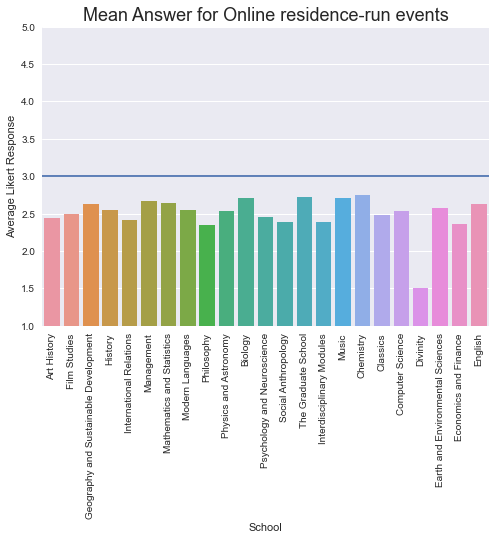

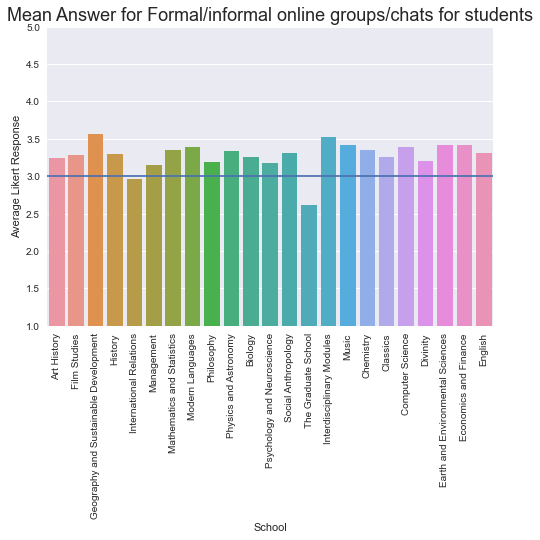

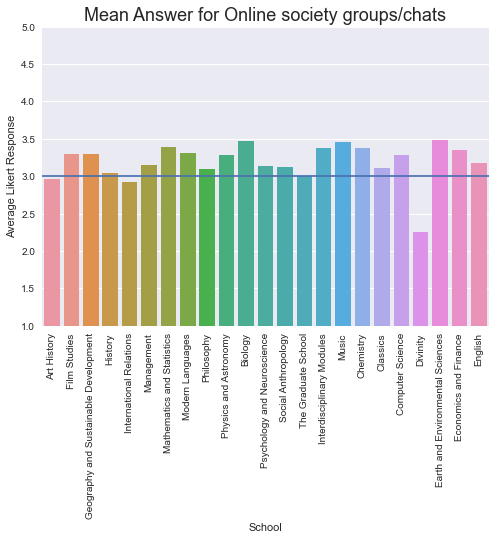

In [68]:
#school / social
# This function takes either a number or list of numbers, and returns the string representation(s) of the numbers as shown in the dictionary
# ETdemoQ10dic. While the list of numbers is a comma-seperated string, a single number is treated as a float
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ10dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ10dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!
ETdemonew = ET.copy()
ETdemoQ10 = ETdemonew['Q10'] 
ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 16] 

ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 25] 
ETdemoQ10dic = {
    1:"Art History", 
    10:"Film Studies", 
    11:"Geography and Sustainable Development", 
    12:"History", 
    13:"International Relations",
    14:"Management",
    15:"Mathematics and Statistics",
    17:"Modern Languages",
    18:"Philosophy",
    19:"Physics and Astronomy",
    2:"Biology",
    20:"Psychology and Neuroscience",
    21:"Social Anthropology",
    22:"The Graduate School",
    23:"Interdisciplinary Modules",
    24:"Music",
    3:"Chemistry",
    4:"Classics",
    5:"Computer Science",
    6:"Divinity",
    7:"Earth and Environmental Sciences",
    8:"Economics and Finance",
    9:"English"
}

ETdemoQ10 = ETdemoQ10.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q10'] = ETdemoQ10

ETdemonew = ETdemonew[ETdemonew['Q10'].notnull()]
ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 16] 

ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 25] 
ETmultiindex = pd.MultiIndex.from_product([ETdemoQ10dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q10', 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q33_6', 'Q33_7', 'Q33_8']]

valuecountsdict = {}

categories = ETdemoQ10dic.values()
for column in ETfiltered.columns:
    if column == 'Q10':
        continue
    
    means = []
    for category in  ETdemoQ10dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q10'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
       
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    
    ETtripledic = {
        "Q33_1":"Online society events", 
        "Q33_2":"Online union-run events", 
        "Q33_3":"Online school-run events", 
        "Q33_4":"Online residence-run events", 
        "Q33_5":"Formal/informal online groups/chats for students", 
        "Q33_6":"Online society groups/chats",
        "Q33_7":"Peer interactions in academic settings", 
        "Q33_8":"Icebreaking/friend-making events" 
    }
    
    if not ETtripleplotZ.empty:
        plt.figure()
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("School")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=18)
        plt.xticks(rotation=90)
        plt.axhline(3)

The above graphs show the differences in schools' average likert responses to several social questions that were found to be significant via the z-score method.

- For online society events: the graduate school and divinity scored particularly low.

- For online union-run events: Divinity scored particularly low.

- For online school-run events: Divinity scored particularly low.

- For online residence run events: Divinity scored particularly low.

- For online group chats: the graduate school scored particularly low.

- For online society-run group chats: Divinity scored particularly low.

Divinity students rating online social events particularly low appears to be a trend in the data.  This could be due to the fact that many online social events were online pub quizzes/crawls, which may not appeal to all cohorts of students - but this is just a speculation.  Qualitative text answers from the questionnaire may give some insight into why this trend exists.

In [69]:
#The last thing to look at is some basic stats for these categories:
#previous online experience, struggle financially, financial support, study abroad

In [70]:
#Lets start by trying to find the percentages of student who did / did not have previous online learning experience
#1 is yes, 2 is no
ETonline = ET['Q9']

#Dropping na here gets rid of participants who left the question blank
ETonline.dropna()

11      1.0
36      1.0
41      2.0
42      2.0
43      2.0
       ... 
1136    2.0
1137    2.0
1138    2.0
1140    2.0
1141    1.0
Name: Q9, Length: 955, dtype: float64

In [71]:
ETonline.count()
#The total is 955
ETonline.value_counts()
#this gets the counts of each individual choice (yes or no)

2.0    698
1.0    257
Name: Q9, dtype: int64

In [72]:
#This gets the value counts as a percentage of the total count, and then sorts them by index value
ETonper = (ETonline.value_counts()/ETonline.count() * 100).sort_index()

In [73]:
#Creating variables that include only the specific index wanted.
ETon1 = onedec(ETonper[1])
ETon2 = onedec(ETonper[2])

#printing these index values
print("Total Number of Students with Previous Online Learning Experience: " + ETon1 + "%")
print("Total Number of Students without Previous Online Learning Experience: " + ETon2 + "%")

Total Number of Students with Previous Online Learning Experience: 26.9%
Total Number of Students without Previous Online Learning Experience: 73.1%


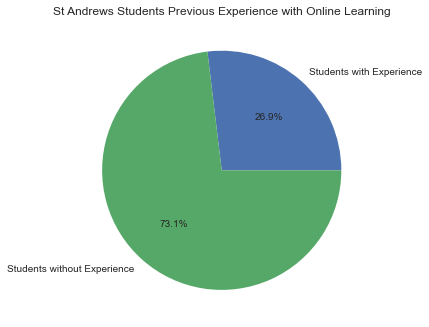

In [74]:
#Lets plot a simple pie chart
labels = ['Students with Experience','Students without Experience']
plt.figure()
#The autopct code gets the values of the pie pieces to show on the chart
plt.pie(ETonper, labels=labels, autopct="%1.1f%%")
plt.title("St Andrews Students Previous Experience with Online Learning")
plt.show()

The majority of students did not have any previous experience with online learning.  This is important because, according to previous literature, students who had previous experience with online learning were more accepting of the transition to emergency online learning.  This may mean that the opinions of St Andrews students could differ from other institutions where most students DO have prior experience with emergency online learning - an important factor to consider when comparing other research and literature to our own University.

In [75]:
#Lets find out how many students were study abroad... if there is a significant percent of survey-answerers then we will conduct full analysis on them
ETabroad = ET['Q51']

In [76]:
#Dropping the participants that did not answer the question
ETabroad = ETabroad.dropna()

In [77]:
ETabroad.count()
#56 is not a good number to describe the count, as every study abroad student should be selecting two options

56

In [78]:
#1 - inbound, 2 - outbound, 3 - semester abroad, 4 - year abroad
print(ETabroad.value_counts())

#Hardly any students answered two options like they were supposed to.  I will stop analyzing this data here as it doesn't show the intended
#answers.

4          24
1          16
3           6
2           4
2,4         2
1,2         1
1,2,3,4     1
3,4         1
1,4         1
Name: Q51, dtype: int64


Most participants did not answer this question correctly, therefore the data needs to be scrapped.  In the future, this should be made into two separate questions, so that participants understand that both inbound/outbound and semester/year abroad require answers.

In [79]:
#The last thing to analyze is the financial status questions.

#Selecting only the relevant columns
ETfin0 = ET.loc[:,['Question 3', 'Q61_1', 'Q61_2','Q61_3']]

#Question 3 asks if students struggled financially during the semester.  
#Questions 61_(1-3) are tick box questions, asking the following info:
#61_1: I did not receive any financial help
#61_2: I received financial help from the University
#61_3: I received financial help from an external source

#Note that it is possible for a participant to select two of these answers (i.e. they received help from both the University and an external source).

In [80]:
# 1 = yes, 2 = no, 3 = prefer not to say; we will be treating prefer not to say as no.  Therefore, we only want responses that answered 1.
ETfinance = ETfin0[ETfin0['Question 3'] == 1]

In [81]:
#These three questions correspond to whether or not the student got financial help.  Q61_1 is no, Q61_2 is yes (help from uni),
#Q61_3 is yes (from external sources)
ETfinance = ETfinance.fillna(0)
print(ETfinance)

      Question 3  Q61_1  Q61_2  Q61_3
43           1.0    0.0    0.0    1.0
44           1.0    1.0    0.0    0.0
45           1.0    1.0    0.0    0.0
50           1.0    1.0    0.0    0.0
51           1.0    1.0    0.0    0.0
...          ...    ...    ...    ...
1119         1.0    1.0    0.0    0.0
1124         1.0    1.0    0.0    0.0
1126         1.0    1.0    0.0    0.0
1129         1.0    1.0    0.0    0.0
1141         1.0    1.0    0.0    0.0

[191 rows x 4 columns]


In [82]:
#first lets find the percentage of studnets that did financially struggle
ETfinper = ETfinance['Question 3'].count()/ETfin0['Question 3'].count() * 100
print("Percentage of Students Who Struggled Financially: " + onedec(ETfinper) + "%")

Percentage of Students Who Struggled Financially: 20.3%


In [83]:
#These students answered incorrectly (as they responded neither that they didn't receive help nor that they did)
print(ETfinance.query("Q61_1 == 0 and Q61_2 == 0 and Q61_3 == 0"))

     Question 3  Q61_1  Q61_2  Q61_3
71          1.0    0.0    0.0    0.0
222         1.0    0.0    0.0    0.0
702         1.0    0.0    0.0    0.0
900         1.0    0.0    0.0    0.0


In [84]:
#This query selects only answers that were not equal to 1 in either 61_1 or 61_2 (or 61_3 in the next line).
#We want to remove these responses as they indicate that the respondent both received and didn't receive financial help
ETfinance = ETfinance.query("Q61_1 != 1 or Q61_2 != 1")
ETfinance = ETfinance.query("Q61_1 != 1 or  Q61_3 != 1")

#This is used to create a "both" column, which includes students who recieved help from both the University and external sources
ETfinance['both'] = (ETfinance['Q61_2'] == 1) & (ETfinance['Q61_3'] == 1) 

#For students who selected both, we modify their response so that their only response was both (so that they aren't counted twice)
ETfinance.loc[ETfinance.both==True, ['Q61_2', 'Q61_3']] = 0, 0

In [85]:
#Now lets find the percentages for the other three questions and graph them on a pie chart
ETfinper1 = onedec(ETfinance['Q61_1'].value_counts()[1]/ETfinance['Question 3'].count() * 100)
ETfinper2 = onedec(ETfinance['Q61_2'].value_counts()[1]/ETfinance['Question 3'].count() * 100)
ETfinper3 = onedec(ETfinance['Q61_3'].value_counts()[1]/ETfinance['Question 3'].count() * 100)
ETfinperboth = onedec(ETfinance['both'].value_counts()[True]/ETfinance['Question 3'].count() * 100)
#We are getting lower than 100% of total students because some people who said that they did struggle financially
#did not answer any of the three follow-up prompts (i.e. incorrectly). This means our percentage counts do not add up to 100%,
#but the pie chart will automatically scale input values to equal 100% excluding those 4 students.

In [86]:
#printing the percentage values
print("Percentage of Those Students Who Did Not Get Help: " + ETfinper1 + "%")
print("Percentage of Those Students Who Received University Help: " + ETfinper2 + "%")
print("Percentage of Those Students Who Received External Help: " + ETfinper3 + "%")
print("Percentage of Those Students Who Received Both: " + ETfinperboth + "%")

Percentage of Those Students Who Did Not Get Help: 62.4%
Percentage of Those Students Who Received University Help: 21.2%
Percentage of Those Students Who Received External Help: 5.8%
Percentage of Those Students Who Received Both: 8.5%


In [87]:
#creating a dataframe that includes the above percentages
ETfinperfinal = pd.DataFrame([ETfinper1, ETfinper2, ETfinper3, ETfinperboth])

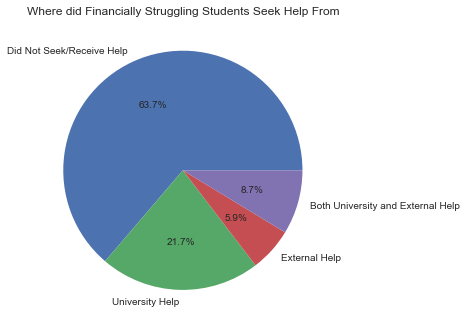

In [88]:
#plotting above percentages as a pie chart
labels = ['Did Not Seek/Receive Help','University Help', 'External Help', 'Both University and External Help']
plt.figure()
#The autopct code gets the values of the pie pieces to show on the chart
plt.pie(ETfinperfinal[0], labels=labels, autopct="%1.1f%%")
plt.title("Where did Financially Struggling Students Seek Help From")
plt.show()

The group we are most interested in here is the students who did financially struggle but received no help.  In this case, it was 63.7% (a majority) of the students who reported that they did financially struggle during this semester.  This means that more financial help should be given, and the help that is given should be better advertised and made accessible to these students.

Conclusion:

Part 1:

The overall results for the University as a whole were relatively neutral in each of the three categories (academic, wellbeing, social).  This is likely not the result of two opposing extreme groups.  Certain aspects of online learning are academically liked, such as recorded lectures, schedule flexibility, online reading lists and materials, online exams, and function of devices/wifi.  These are the positive elements of emergency online learning that we can look into keeping or merging into our future semesters going forward.  Feelings of belonging/identity within the University and individual schools were both rated surprisinly low - this will be a focus point for improvement within the University going forward.

The questionnaire could have been better, especially if the length of it was shortened.

Part 2:

There were some specific demographic categories that scored differntly on academic, wellbeing, and social topics.  However, knowing the total number of these demographics in the student population is essential to understanding the relevance of the data.  Inferential statistics will be needed going forward.

There was not any interesting results for gender or accommodation type.

There were differences between specific schools in all three categories (academic, wellbeing, social).  Likewise, total populations is needed to understand the data within context, and inferential statistics will be needed going forward.  

Most students did not have prior experience with online learning, and the majority of students that financially struggled during this semester did not receive financial support.

In conclusion, more research should go into demographic categories, differences between schools, and financial support for struggling students.

